# Nadaraya Watson Regression

This is a simple example of use attention to solve the regression problem, noted that I rewrite the notebook of [Nadaraya-Watson kernel regression](https://github.com/donglinkang2021/attention_muli/blob/main/13_attention_1_pooling.ipynb) here.

In [1]:
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt
np.random.seed(2024)

## Generate data

x_train.shape = (100,), y_train.shape = (100,)
x_val.shape = (100,), y_val.shape = (100,)


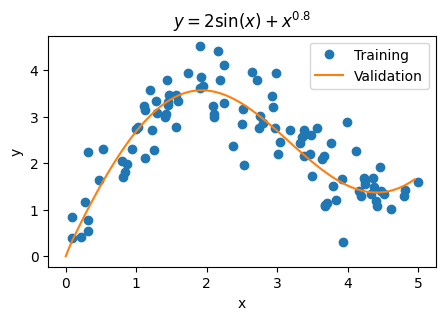

In [2]:
n_train = 100  # number of training examples
x_train = np.sort(np.random.rand(n_train) * 5)  # training inputs after sorting

def f(x):
    return 2 * np.sin(x) + x**0.8

y_train = f(x_train) + np.random.normal(0.0, 0.5, (n_train,))  # training outputs
x_val = np.arange(0, 5, 0.05)  # validation inputs
y_val = f(x_val)  # validation outputs

print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")

plt.figure(figsize=(5, 3))
plt.plot(x_train, y_train, 'o')
plt.plot(x_val, y_val, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training', 'Validation'])
plt.title('$y = 2 \sin(x) + x^{0.8}$')
plt.show()

In [3]:
x_train = rearrange(x_train, 'l1 -> l1 ()')
y_train = rearrange(y_train, 'l1 -> l1 ()')
x_val = rearrange(x_val, 'l2 -> l2 ()')
y_val = rearrange(y_val, 'l2 -> l2 ()')
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")

x_train.shape = (100, 1), y_train.shape = (100, 1)
x_val.shape = (100, 1), y_val.shape = (100, 1)


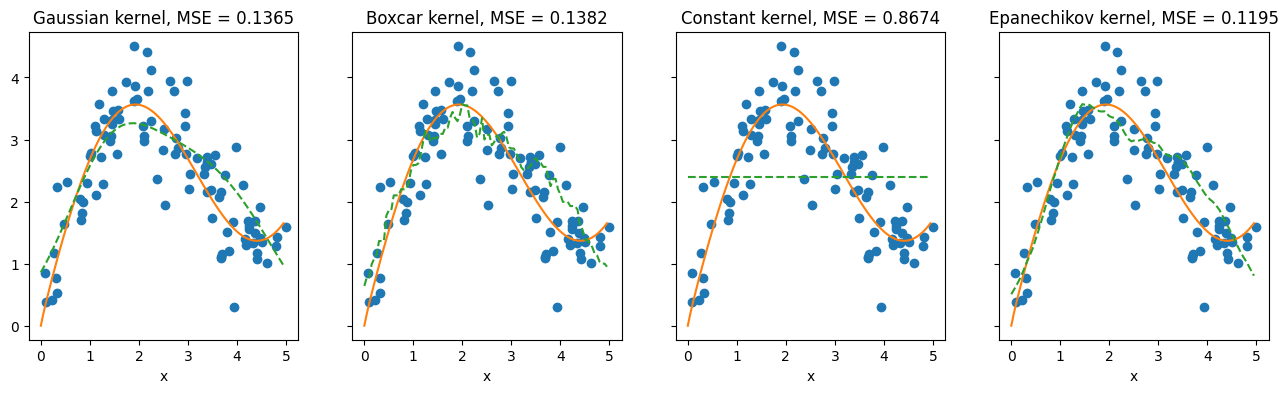

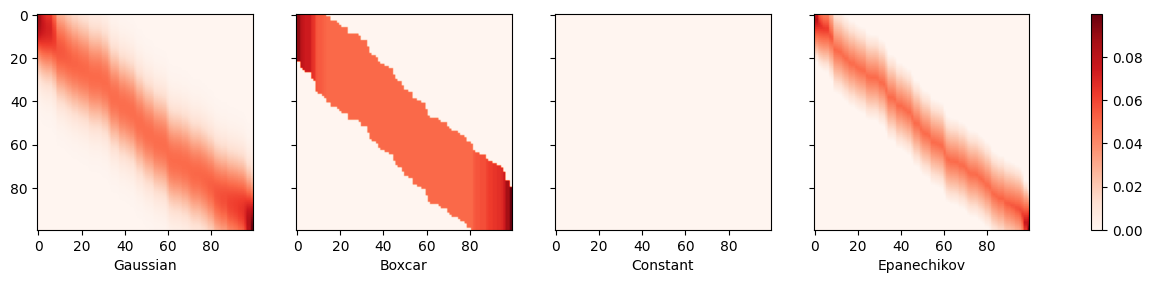

In [6]:
from attention import nadaraya_watson
from metric import mse

# draw y_hat
fig, axes = plt.subplots(
    1, 4, 
    sharey=True, 
    figsize=(16, 4)
)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
for name, ax in zip(names, axes):
    # 调用 nadaraya_watson 函数，计算预测值和注意力权重
    y_hat, _ = nadaraya_watson(query=x_val, key=x_train, value=y_train, kernel=name)
    # 计算均方误差
    mse_val = mse(y_hat, y_val)
    # 绘制图像
    ax.plot(x_train, y_train, 'o')
    ax.plot(x_val, y_val, '-')
    ax.plot(x_val, y_hat, '--')
    ax.set_title(f'{name} kernel, MSE = {mse_val:.4f}')
    ax.set_xlabel('x')
plt.show()

# draw attention weights
fig, axes = plt.subplots(
    1, 4, 
    sharey=True, 
    figsize=(16, 4)
)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
for name, ax in zip(names, axes):
    _, attention_w = nadaraya_watson(query=x_val, key=x_train, value=y_train, kernel=name)
    pcm = ax.imshow(attention_w, cmap='Reds')
    # 设置子图的x轴标签为名称
    ax.set_xlabel(name)

fig.colorbar(pcm, ax=axes, shrink=0.7)
plt.show()
